In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]

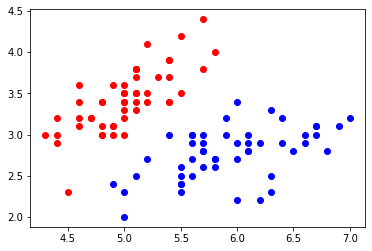

In [3]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')

In [4]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [6]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0)

In [7]:
def plot_decision_boundary(model,axis):
    """
    model：模型
    axis:坐标轴的范围；0123对应的就是x轴和y轴的范围
    """
    # 使用linspace将x轴，y轴划分成无数的小点
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)

<ipython-input-7-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


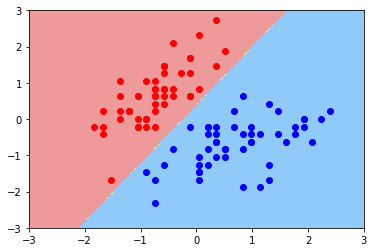

In [8]:
plot_decision_boundary(svc,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')

In [9]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard,y)

LinearSVC(C=0.01)

<ipython-input-7-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


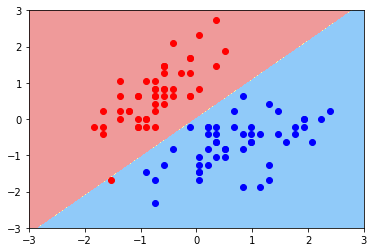

In [10]:
# 绘制决策边界---C放小之后，容错空间变大，所以犯了一个错误
plot_decision_boundary(svc2,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')

In [11]:
# svc 天然的支持多分类的问题，如果是多分类问题，在特征平面内就会有多条直线，
# 这里是二分类，所以只有一跟直线，放在了二维数组的第一个元素中
svc.coef_

array([[ 4.03242198, -2.50699857]])

In [12]:
svc.intercept_

array([0.92736822])

In [13]:
def plot_svc_decision_boundary(model,axis):
    """
    model：模型
    axis:坐标轴的范围；0123对应的就是x轴和y轴的范围
    """
    # 使用linspace将x轴，y轴划分成无数的小点
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    plot_x = np.linspace(axis[0],axis[1],200)
    up_y = -w[0]/w[1] * plot_x - b / w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b / w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

<ipython-input-13-2f4a93d68a74>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


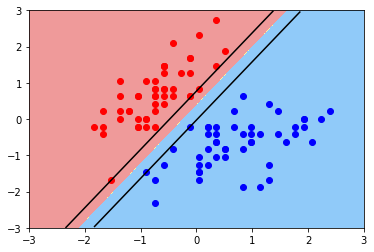

In [14]:
plot_svc_decision_boundary(svc,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')
# 落在两根直线上的这些点即为支撑向量，这两条直线中间的距离即为margin。

<ipython-input-13-2f4a93d68a74>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


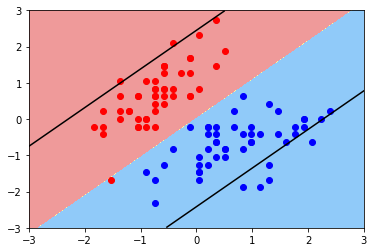

In [15]:
plot_svc_decision_boundary(svc2,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')

In [16]:
svc3 = LinearSVC(C=0.1)
svc3.fit(X_standard, y)

LinearSVC(C=0.1)

<ipython-input-13-2f4a93d68a74>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


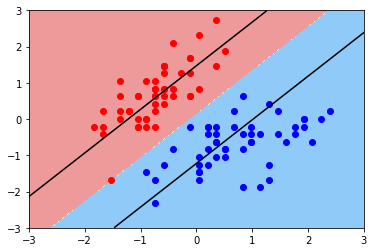

In [17]:
plot_svc_decision_boundary(svc3,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='blue')

# SVM中使用多项式特征和核函数

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
# 生成不真实的非线性的数据集
X, y = datasets.make_moons()

In [6]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

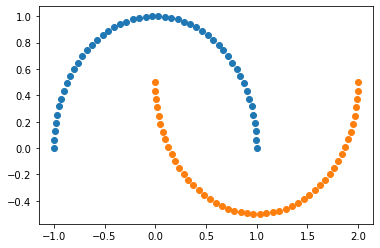

In [8]:
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])

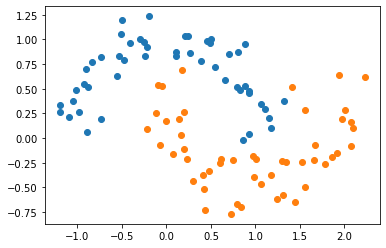

In [9]:
X, y = datasets.make_moons(noise=0.15,random_state=666)
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])

In [10]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("linearSVC",LinearSVC(C=C))
    ])

In [11]:
poly_svc = PolynomialSVC(degree=3)

In [12]:
poly_svc.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

In [15]:
import numpy as np
def plot_decision_boundary(model,axis):
    """
    model：模型
    axis:坐标轴的范围；0123对应的就是x轴和y轴的范围
    """
    # 使用linspace将x轴，y轴划分成无数的小点
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


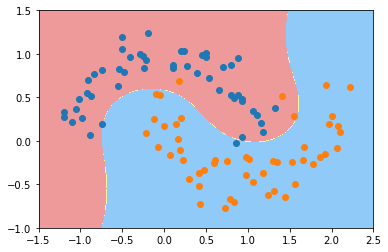

In [16]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])

# 使用多项式核函数的SVM

In [18]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=1.0):
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("kernelSVC",SVC(kernel="poly",degree=degree,C=C))
    ])

In [19]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


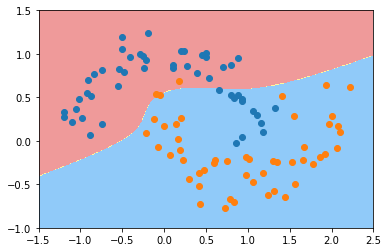

In [20]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])

# 使用程序直观理解高斯函数

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x = np.arange(-4,5,1)

In [24]:
x 

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [26]:
y = np.array((x >= -2) & (x <= 2),dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

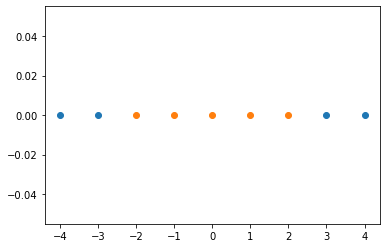

In [27]:
plt.scatter(x[y==0],[0]*len(x[y==0]))
plt.scatter(x[y==1],[0]*len(x[y==1]))

In [28]:
def gaussian(x,l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [29]:
l1,l2 = -1,1

X_new = np.empty((len(x),2))
for i,data in enumerate(x):
    X_new[i,0] = gaussian(data,l1)
    X_new[i,1] = gaussian(data,l2)

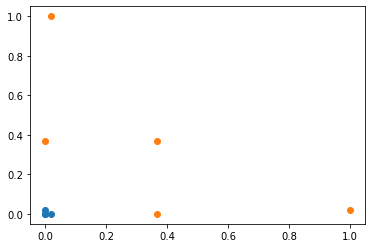

In [32]:
plt.scatter(X_new[y==0,0],X_new[y==0,1])
plt.scatter(X_new[y==1,0],X_new[y==1,1])

# RBF核函数中的gamma

In [33]:
import numpy as np
import matplotlib.pyplot as plt

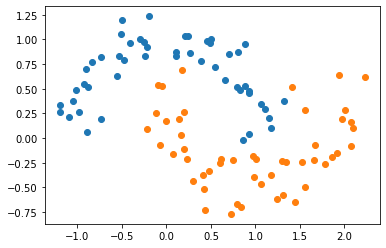

In [34]:
from sklearn import datasets
X,y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
def RBFKernalSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("svc",SVC(kernel="rbf", gamma=gamma))
    ])

In [36]:
svc = RBFKernalSVC()

In [37]:
svc.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1.0))])

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


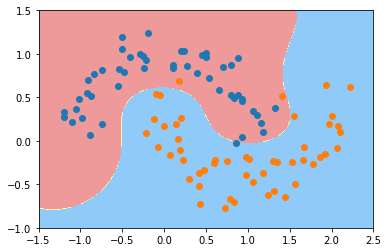

In [38]:
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [39]:
svc_gamma100 = RBFKernalSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=100))])

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


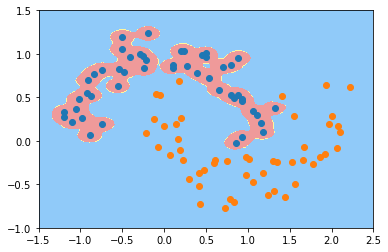

In [40]:
plot_decision_boundary(svc_gamma100,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


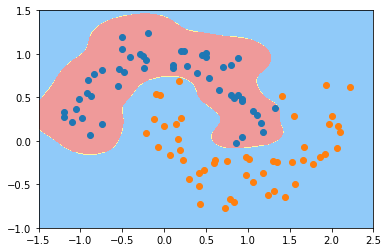

In [41]:
svc_gamma10 = RBFKernalSVC(gamma=10)
svc_gamma10.fit(X, y)
plot_decision_boundary(svc_gamma10,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


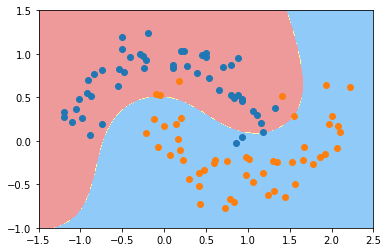

In [42]:
svc_gamma05 = RBFKernalSVC(gamma=0.5)
svc_gamma05.fit(X, y)
plot_decision_boundary(svc_gamma05,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

<ipython-input-15-fa039f6d3e81>:17: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


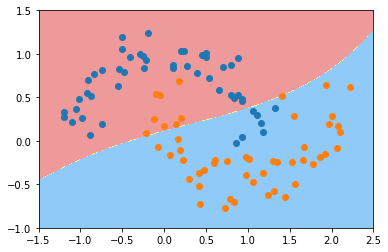

In [43]:
svc_gamma01 = RBFKernalSVC(gamma=0.1)
svc_gamma01.fit(X, y)
plot_decision_boundary(svc_gamma01,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# SVM思想解决回归问题

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [48]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('linear_svr',LinearSVR(epsilon=epsilon))
    ])

In [49]:
svr = StandardLinearSVR()
svr.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_svr', LinearSVR(epsilon=0.1))])

In [50]:
svr.score(X_test,y_test)

0.6356671150189633